# Test

Import usefull packages + the njord library. For installations details please refer to README file. 

In [10]:
import njord as nj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Hyper parameters

In [15]:
PATH = "../dataset"
SYMBOL = "btcusdt"
FILENAME = "dataset_binance_{}_period_600.csv".format(SYMBOL)
LOOKBACK = 8
LOOKUP = 1

## Dataset

Load the dataset from .csv file to a pandas dataframe.

In [3]:
dataset = pd.read_csv(PATH + "/" + FILENAME)
dataset = dataset.set_index("time")
dataset.index = pd.to_datetime(dataset.index)

In [4]:
print("Dataset size = \n{}".format(dataset.size))
print("Dataset head = \n{}".format(dataset.head()))

Dataset size = 
11748
Dataset head = 
                     open_price_#t  high_price_#t  low_price_#t  \
time                                                              
2018-10-01 00:10:00        6626.57        6649.00       6622.13   
2018-10-01 00:20:00        6645.21        6648.00       6632.59   
2018-10-01 00:30:00        6640.03        6655.00       6638.98   
2018-10-01 00:40:00        6643.43        6653.33       6638.78   
2018-10-01 00:50:00        6650.00        6653.70       6641.30   

                     close_price_#t  avg_price_#t  sum_qty_diff_norm_#n  
time                                                                     
2018-10-01 00:10:00         6645.20   6639.074520              0.270180  
2018-10-01 00:20:00         6640.03   6639.989762              0.216486  
2018-10-01 00:30:00         6643.41   6648.777817              0.536584  
2018-10-01 00:40:00         6648.80   6644.145194             -0.020611  
2018-10-01 00:50:00         6645.02   6646.06837

## Batch

We now have to build the batch, i.e. a feature array X with its associated targets Y. 

In [5]:
batch = nj.Batch(dataset, 8, 1)

In [6]:
print(batch)

Batch(root = 11748, lk = [7, 6, 5, 4, 3, 2, 1, 0], la = [-1], data = None)


In [7]:
X, Y = batch.build()
print("X shape = {}".format(X.shape))
print("Y shape = {}".format(Y.shape))

X shape = (1950, 8, 6)
Y shape = (1950, 1, 6)


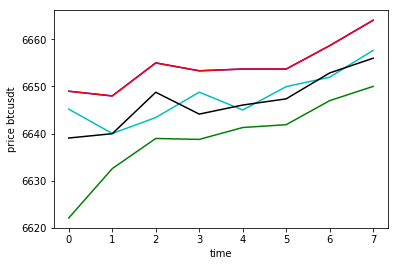

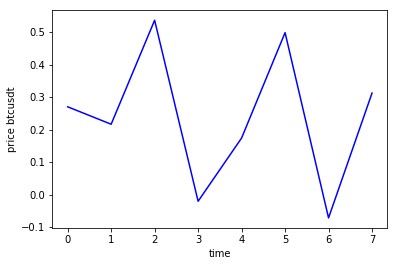

In [24]:
fig = plt.figure()
plt.plot(X[0,:,1], color="b")
plt.plot(X[0,:,1], color="r")
plt.plot(X[0,:,2], color="g")
plt.plot(X[0,:,3], color="c")
plt.plot(X[0,:,4], color="k")
plt.xlabel("time")
plt.ylabel("price {}".format(SYMBOL))
plt.show()

fig = plt.figure()
plt.plot(X[0,:,5], color="b")
plt.xlabel("time")
plt.ylabel("price {}".format(SYMBOL))
plt.show()

## Normalise the data

We now have the normalise the timeseries data before enterrring the training loop.